---

Grupo 9
* Bosch, Candelaria
* Juarez, Manuel
* Mecchia, Martín
* Montironi, Sebastian


---

# Laboratorio 1: Regresión en California

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "California Housing dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [ ]:
from sklearn.datasets import fetch_california_housing
X_california, y_california = fetch_california_housing(return_X_y=True, as_frame=True)
california = fetch_california_housing()

In [ ]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
print(california['DESCR'])  # descripción del dataset
#california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [ ]:
california['feature_names'] # nombres de los atributos para cada columna de 'data'
#california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
california['data']           # matriz con los datos de entrada (atributos)
#print(california['target']) # vector de valores a predecir

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [ ]:
print(california['target']) # vector de valores a predecir

[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [ ]:
california['data'].shape, california['target'].shape

((20640, 8), (20640,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [ ]:
from sklearn.model_selection import train_test_split
x, y = california['data'], california['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
x_train.shape, x_test.shape

((16512, 8), (4128, 8))

In [ ]:
y.shape

(20640,)

In [ ]:
y_test.shape

(4128,)

In [ ]:
print('El tamaño de los datos INPUT de entrenamiento es :',x_train.shape)
print('El tamaño de los datos INPUT de testeo es :', x_test.shape)
print('El tamaño de los datos OUTPUT (labels/datos taggeados) de entrenamiento es :',y_train.shape)
print('El tamaño de los datos OUTPUT (labels/datos taggeados) de testeo es :', y_test.shape)

El tamaño de los datos INPUT de entrenamiento es : (16512, 8)
El tamaño de los datos INPUT de testeo es : (4128, 8)
El tamaño de los datos OUTPUT (labels/datos taggeados) de entrenamiento es : (16512,)
El tamaño de los datos OUTPUT (labels/datos taggeados) de testeo es : (4128,)


## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1.   Se trata de un dataset con informacion inmobiliara de Californa derivado de un Censo de EEUU en 1990. Da informacion sobre la unidad mas pequeña de la cual se publican datos de muestra censales, definida como grupo de bloque (Block Group). Cada Block Group tiene entre 600 y 3000 personas. \

Def importante:
* Household (Hogar): Grupo de personas que residen dentro de una casa. El numero de habitaciones (rooms) y dormitorios (bedrooms) se proporcionan por hogar. Estas columnas rooms y bedrooms pueden tomar valores grandes (para grupos de bloques con pocos hogares) y vacios (para casas vacias usadas como centros vacacionales)

2.   La variable objetivo es el **valor medio de la vivienda** para los distritos de California, expresado en cientos de miles de dólares ($100,000). \

Al tener varios distritos dentro de california, se busca un valor medio que represente a las viviendas cada distrito.

3. Los atributos/columnas del dataset son:

* MedInc: ingreso medio en grupo de bloque
* HouseAge: edad media de la casa en el grupo de bloque
* AveRooms: promedio de habitaciones por hogar (Ambientes)
* AveBedrms: promedio de dormitorios por hogar (Para dormir)
* Population: población del grupo de bloque
* AveOccup: promedio de miembros del hogar
* Latitud: latitud del grupo de bloques
* Longitud: longitud del grupo de bloques

4. Para poder:
* ubicar geograficamente a los Block Groups: Latitude, Longitude
* Para saber el tamaño del Hogar/Vivienda: AveRooms/AveBedrms
* HouseAge: Si block group == district => entonces es relvante porque represente al block group y por ende al distrito.
* MedInc: Me parece relevante porque indica cuanto ganan en el block group (/distrito?) y permite inferir la capacidad de adquirir alquileres mas caros.


5. El problema a priori va a ser el uso al que se este destinando la casa durante el censo. Por ejemplo: "Si es una resort para vacacionar, va a tener 0 ocupantes (AveOccup) y valores muy altos en Habitaciones (AveRooms) y Dormitorios (AveBedrms). Mientras que si es una casa de familia va a tener valores mas razonables. Estos extremos puede hacer que el algoritmo tenga que ajustar funciones a valores muy separados con mucho error en la prediccion o con overfitting.





## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

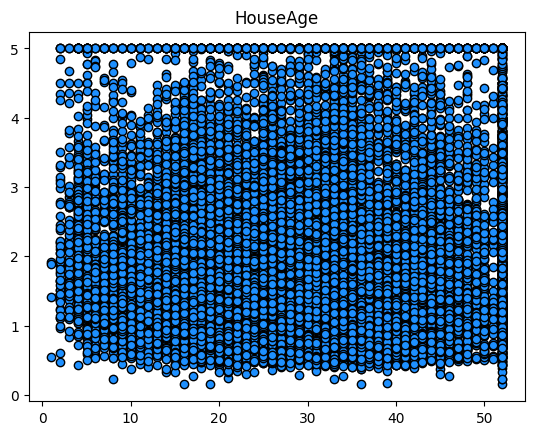

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'HouseAge'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'HouseAge')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

Esta variable parece parece no tener tanta importancia

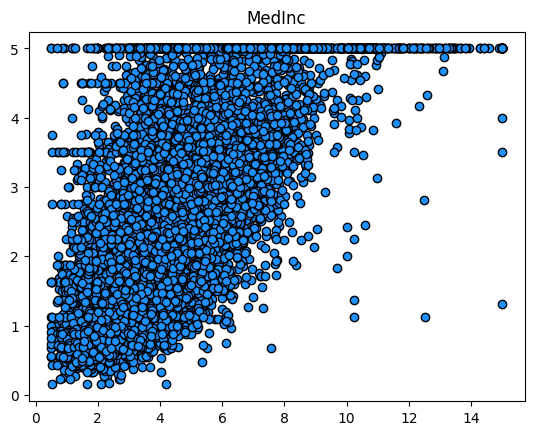

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'MedInc')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

Esta variable de entrada vemos que si tiene mayor relacion con la variable target. A menor ingreso medio por Block Group menor precio promedio de las viviendas en ese Block Group

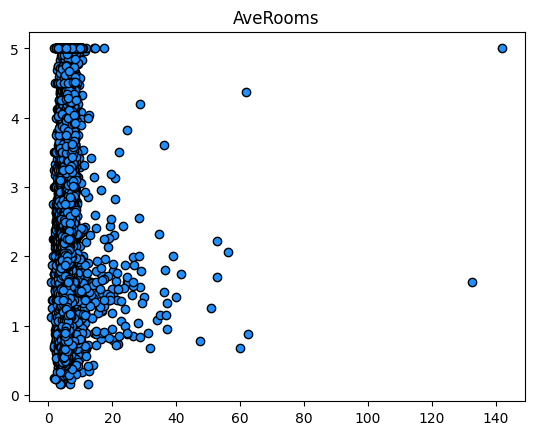

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'AveRooms'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveRooms')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

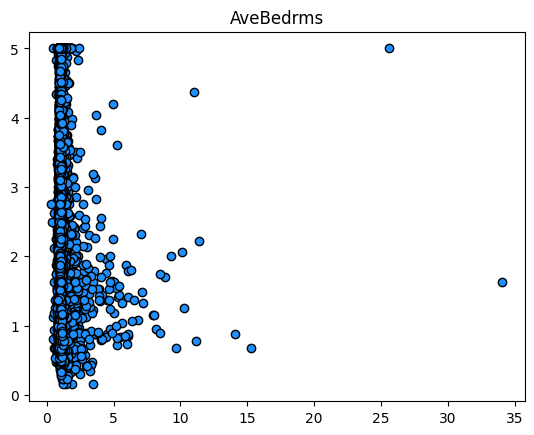

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'AveBedrms'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveBedrms')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

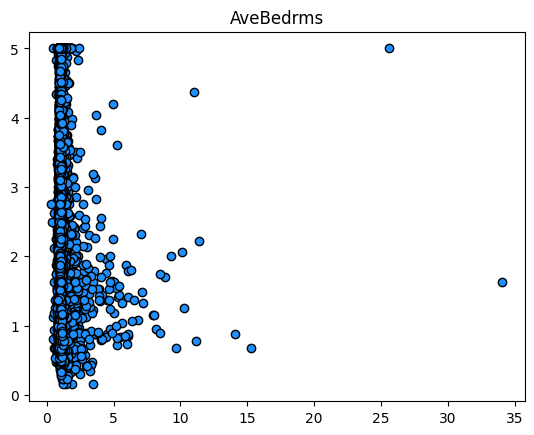

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'AveBedrms'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveBedrms')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

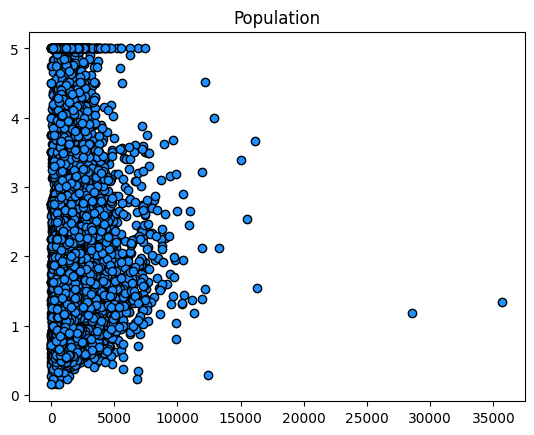

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'Population'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'Population')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

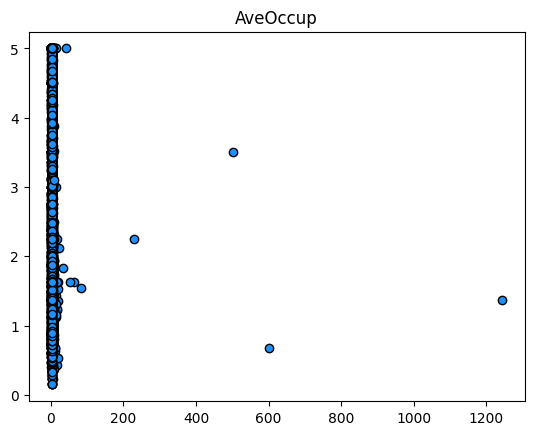

In [ ]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'AveOccup'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveOccup')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

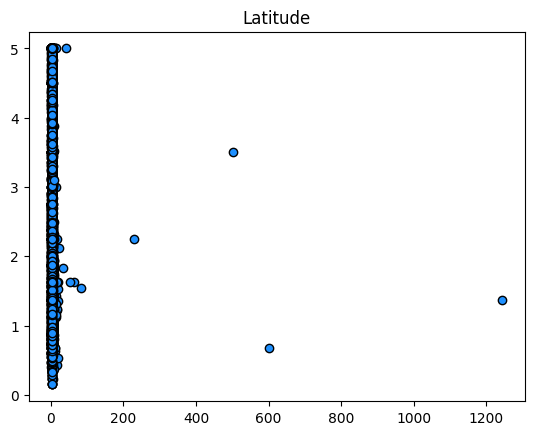

In [ ]:
feature = 'Latitude'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveOccup')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

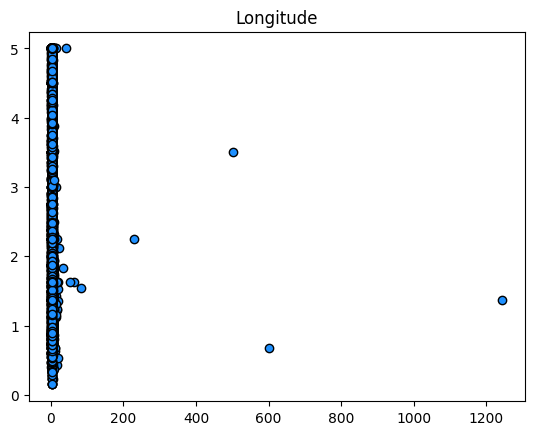

In [ ]:
feature = 'Longitude'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) == 'AveOccup')
plt.scatter(x[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [ ]:
feature = 'MedInc'  # seleccionamos el atributo 'MedInc'
#selector = california['feature_names'].index(feature)
selector = (np.array(california['feature_names']) ==  feature)
x_train_f = x_train[:, selector]
x_test_f = x_test[:, selector]
print('El tamaño del conjunto de datos de entrenamiento segun la variable MedInc es :', x_train_f.shape)
print('El tamaño del conjunto de datos de testeo segun la variable MedInc es :', x_test_f.shape)

El tamaño del conjunto de datos de entrenamiento segun la variable MedInc es : (16512, 1)
El tamaño del conjunto de datos de testeo segun la variable MedInc es : (4128, 1)


In [ ]:
# 2. Instanciar y entrenar acá.
#HAY QUE HACER UNA REGRESION LINEAL
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train_f, y_train)

In [ ]:
# 3. Predecir y evaluar acá.

#Prediccion
#y_train_pred = f(X_train, w)
#y_val_pred = f(X_val, w)

y_train_pred = reg.predict(x_train_f)
y_test_pred  = reg.predict(x_test_f)

#Evaluacion
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_test_pred)
print(f'Train error: {train_error:f}')
print(f'Val error: {val_error:f}')

Train error: 0.696068
Val error: 0.721498


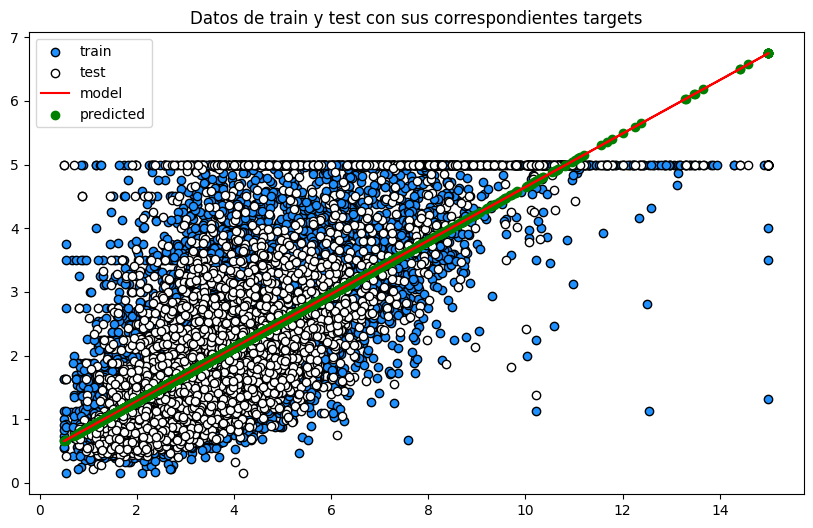

In [ ]:
# 4. Graficar acá.
plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]
plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_train_first, y_train_pred, color="red", label="model")
plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")
plt.show()

---
**Interpretacion:** Podemos ver que el modelo intenta ajustar una recta como modelo para hacer las predicciones de los valores de testing. Esto evidentemente tiene mucho error ya que no se puede abarcar a toda la nube de puntos con un modelo lineal. Hay que intentar con un grafico de regresion polinomial

---

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [ ]:
# 1. Resolver acá.
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [ ]:
train_error_vector=[]
test_error_vector=[]
print("VALORES DE MSE TRAIN Y TEST:")
for i in range(2,15):
  degree = i #Grado de polinomio
  pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
  lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
  model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

  model.fit(x_train[:, 0].reshape(-1, 1), y_train)
  model_predictions_train = model.predict(x_train[:, 0].reshape(-1, 1))
  model_predictions_test = model.predict(x_test[:, 0].reshape(-1, 1))

  train_error = mean_squared_error(y_train, model_predictions_train)
  val_error = mean_squared_error(y_test, model_predictions_test)
  print(f'Train error: {train_error:0.2}')
  print(f'Test error: {val_error:0.2}')
  train_error_vector.append(train_error)
  test_error_vector.append(val_error)
print("LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TRAIN:")
print(train_error_vector)
print("LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TEST:")
print(test_error_vector)

VALORES DE MSE TRAIN Y TEST:
Train error: 0.69
Test error: 0.72
Train error: 0.68
Test error: 0.71
Train error: 0.68
Test error: 0.71
Train error: 0.68
Test error: 0.71
Train error: 0.68
Test error: 0.71
Train error: 0.67
Test error: 0.7
Train error: 0.67
Test error: 0.7
Train error: 0.67
Test error: 0.7
Train error: 0.67
Test error: 0.7
Train error: 0.67
Test error: 0.7
Train error: 0.67
Test error: 0.7
Train error: 0.67
Test error: 0.7
Train error: 0.68
Test error: 0.71
LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TRAIN:
[0.6894859202345499, 0.6782140838210796, 0.6780518857896085, 0.6780050101806553, 0.6760874470470535, 0.6737153167658609, 0.673552528024599, 0.6735503011696153, 0.6733338218485438, 0.6732443383539755, 0.673273893578092, 0.6732429722023932, 0.6827503453223236]
LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TEST:
[0.7174074205923545, 0.7081355393674343, 0.7080431289121552, 0.7079724319207191, 0.7067678778909264, 0.7025961076892766, 0.7021037667138099, 0.7020

In [ ]:
# 2. Graficar curvas de error acá.

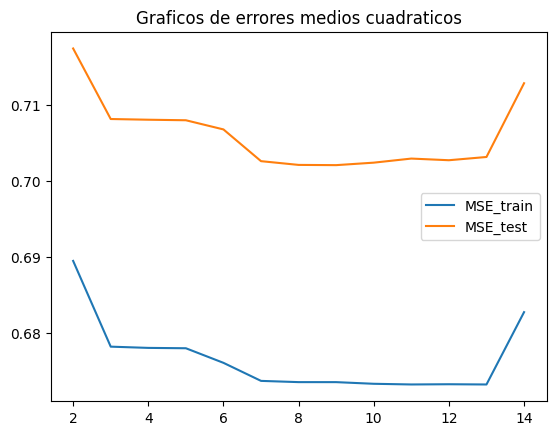

In [ ]:
plt.plot(range(2,15), train_error_vector, label="MSE_train")
plt.plot(range(2,15), test_error_vector, label="MSE_test")
plt.title("Graficos de errores medios cuadraticos")
plt.legend()
plt.show()

---
**Interpretacion de la curva:** Segun lo visto en clase el error cuadratico medio da una medida de error entre el valor veradadero a predecir y el ajustado por el modelo. En el momento en el que el que el MSE_train es muy chico y el el MSE_test empieza  aaumentar es donde ocurre el sobre ajuste de los datos (overfitting). Segun el grafico se daria para un polinomio de grado 13. \
Para corroborarlo procederemos a armar algunas graficas de los polinomios con grados de interes. (Grados 2,4,6,8,12,14)

---

###GRAFICOS DE DISTINTOS GRADOS DE POLINOMIO

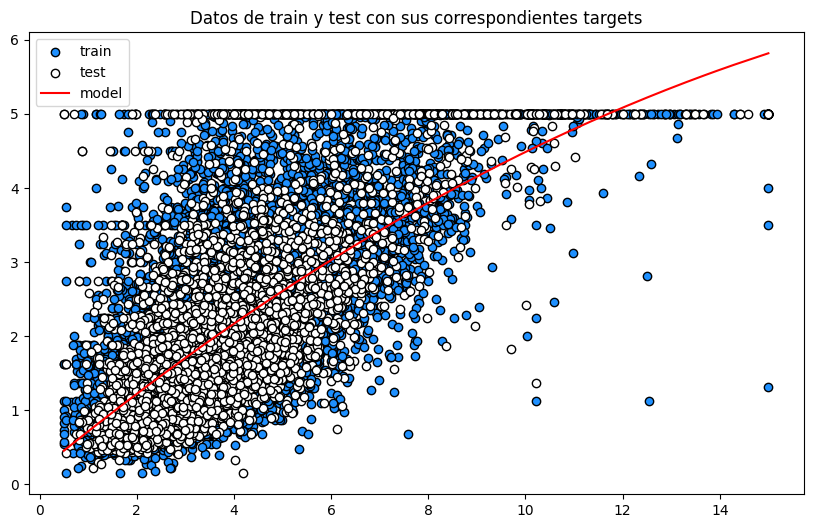

In [ ]:
degree = 2 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, 0].reshape(-1, 1), y_train)
model_predictions = model.predict(x_train[:, 0].reshape(-1, 1))

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")
plt.show()

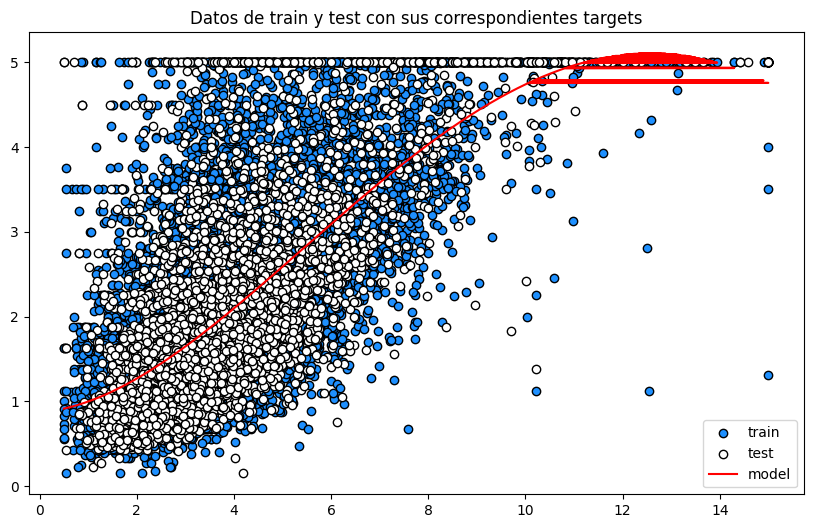

In [ ]:
degree = 4 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, 0].reshape(-1, 1), y_train)
model_predictions = model.predict(x_train[:, 0].reshape(-1, 1))

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")
plt.show()

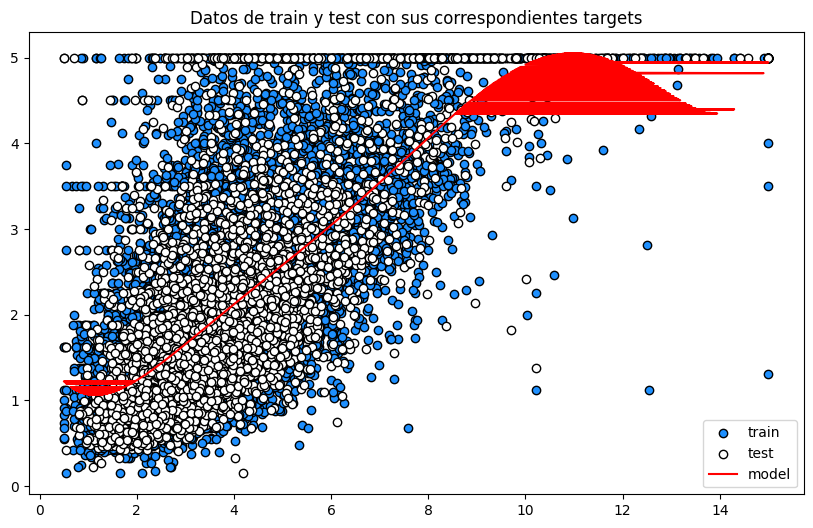

In [ ]:
degree = 6 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, 0].reshape(-1, 1), y_train)
model_predictions = model.predict(x_train[:, 0].reshape(-1, 1))

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")
plt.show()

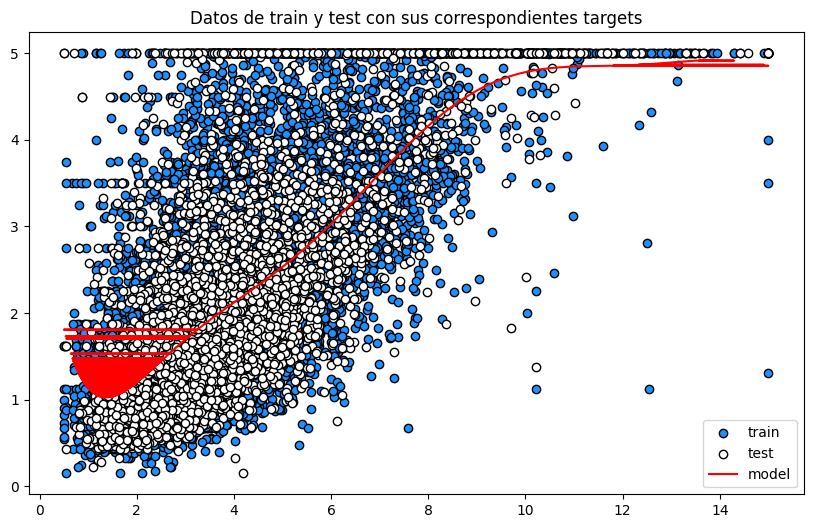

In [ ]:
degree = 8 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, 0].reshape(-1, 1), y_train)
model_predictions = model.predict(x_train[:, 0].reshape(-1, 1))

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")
plt.show()

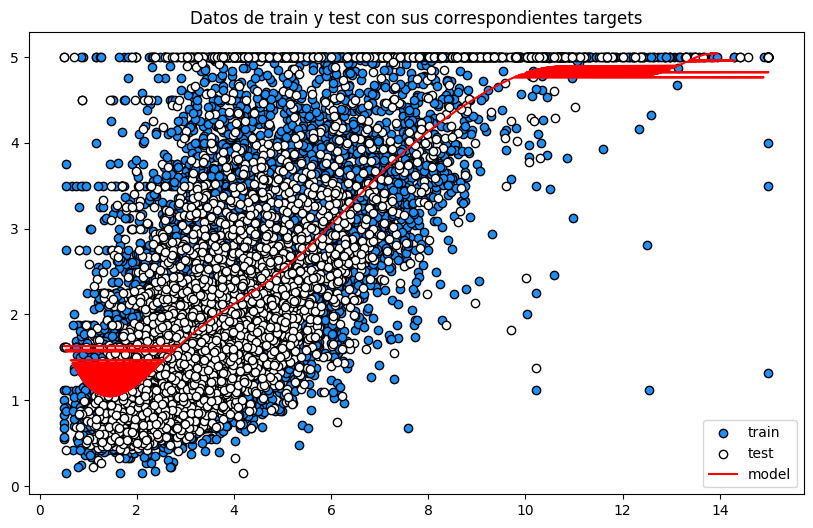

In [ ]:
degree = 12 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, 0].reshape(-1, 1), y_train)
model_predictions = model.predict(x_train[:, 0].reshape(-1, 1))

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")
plt.show()

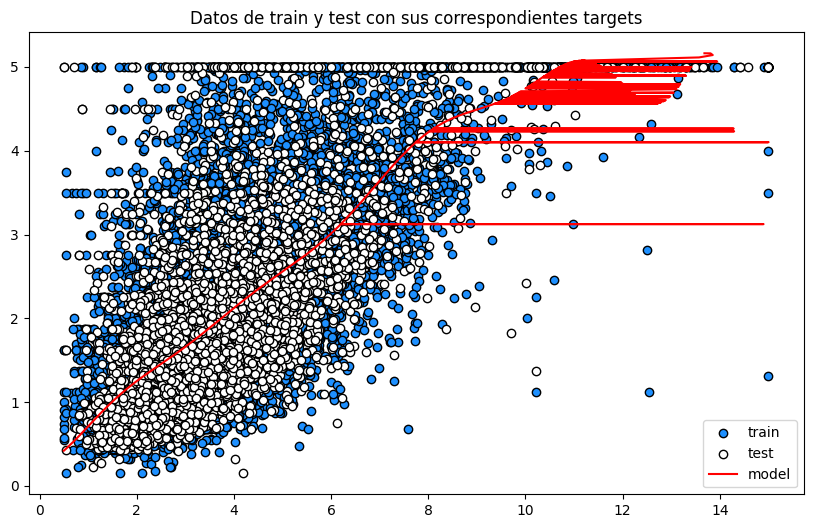

In [ ]:
degree = 14 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, 0].reshape(-1, 1), y_train)
model_predictions = model.predict(x_train[:, 0].reshape(-1, 1))

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")
plt.show()

### Conclusion punto 3

---
Efectivamente el grafico que mejor performance presenta son los los que tienen grados de polinomios entre 8 y 12. Elgimos el polinomio de grado 8 para bajar complejidad al modelo.

---

##
Ejercicio 4

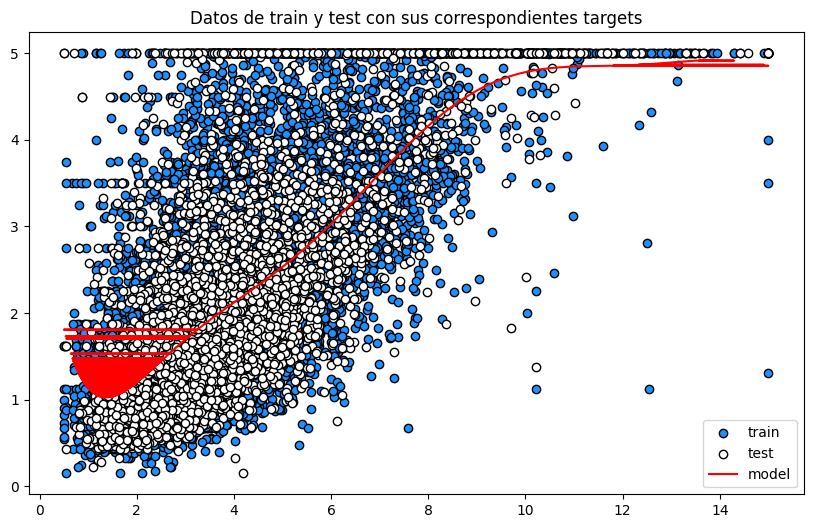

In [ ]:
degree = 8 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, 0].reshape(-1, 1), y_train)
model_predictions = model.predict(x_train[:, 0].reshape(-1, 1))

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:,0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")

plt.show()

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [ ]:
selector = ((np.array(california['feature_names']) == 'MedInc') |
            (np.array(california['feature_names']) == 'Population') |
            (np.array(california['feature_names']) == 'AveBedrms'))

train_error_vector=[]
test_error_vector=[]
print("VALORES DE MSE TRAIN Y TEST:")
for i in range(2,8):
  degree = i #Grado de polinomio
  pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
  lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
  model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

  model.fit(x_train[:, selector], y_train)
  model_predictions_train = model.predict(x_train[:, selector])
  model_predictions_test = model.predict(x_test[:, selector])

  train_error = mean_squared_error(y_train, model_predictions_train)
  val_error = mean_squared_error(y_test, model_predictions_test)
  print(f'Train error: {train_error:0.2}')
  print(f'Test error: {val_error:0.2}')
  train_error_vector.append(train_error)
  test_error_vector.append(val_error)
print("LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TRAIN:")
print(train_error_vector)
print("LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TEST:")
print(test_error_vector)

VALORES DE MSE TRAIN Y TEST:
Train error: 0.69
Test error: 0.72
Train error: 0.67
Test error: 0.7
Train error: 2.3
Test error: 2.1
Train error: 2.7
Test error: 4.2
Train error: 4.6
Test error: 6.7
Train error: 5.3
Test error: 5.9
LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TRAIN:
[0.6864984919737948, 0.6693487994192774, 2.292544373271299, 2.67294022729618, 4.6199386469575, 5.306233527818425]
LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TEST:
[0.7157738364497371, 0.7009251559254541, 2.0735188354307215, 4.21650635495812, 6.728862336960626, 5.928563895052267]


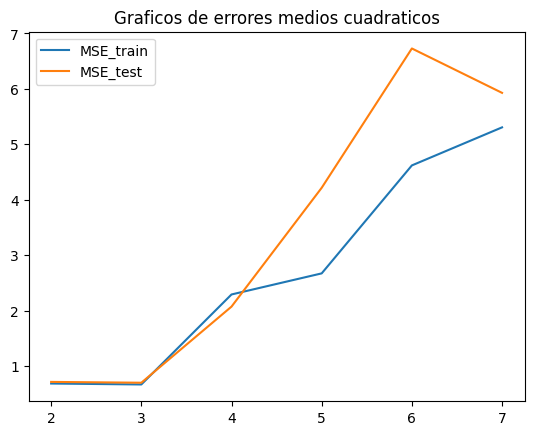

In [ ]:
plt.plot(range(2,8), train_error_vector, label="MSE_train")
plt.plot(range(2,8), test_error_vector, label="MSE_test")
plt.title("Graficos de errores medios cuadraticos")
plt.legend()
plt.show()

In [ ]:
# 2. Resolver acá.

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?


In [ ]:
selector = ((np.array(california['feature_names']) == 'MedInc') |
            (np.array(california['feature_names']) == 'Population') |
            (np.array(california['feature_names']) == 'AveBedrms') |
            (np.array(california['feature_names']) == 'AveRooms') |
            (np.array(california['feature_names']) == 'AveOccup') |
            (np.array(california['feature_names']) == 'Latiude') |
            (np.array(california['feature_names']) == 'Longitude') |
            (np.array(california['feature_names']) == 'HouseAge'))
train_error_vector=[]
test_error_vector=[]
print("VALORES DE MSE TRAIN Y TEST:")
for i in range(2,8):
  degree = i #Grado de polinomio
  pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
  lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
  model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

  model.fit(x_train[:, selector], y_train)
  model_predictions_train = model.predict(x_train[:, selector])
  model_predictions_test = model.predict(x_test[:, selector])

  train_error = mean_squared_error(y_train, model_predictions_train)
  val_error = mean_squared_error(y_test, model_predictions_test)
  print(f'Train error: {train_error:0.2}')
  print(f'Test error: {val_error:0.2}')
  train_error_vector.append(train_error)
  test_error_vector.append(val_error)
print("LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TRAIN:")
print(train_error_vector)
print("LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TEST:")
print(test_error_vector)

VALORES DE MSE TRAIN Y TEST:
Train error: 0.52
Test error: 7.8
Train error: 0.46
Test error: 5.1e+04
Train error: 0.41
Test error: 1.1e+10
Train error: 0.46
Test error: 1.3e+10
Train error: 1.2
Test error: 3.6e+11
Train error: 1.3e+01
Test error: 3.7e+10
LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TRAIN:
[0.5210385154506664, 0.463664483994449, 0.4106819424451316, 0.462405534270406, 1.22241554879009, 13.12062645452952]
LISTA DE VALORES DE ERROR CUADRATICO MEDIO DE DATOS TEST:
[7.800403681374182, 50932.75532990372, 11119506892.350283, 13061046850.47516, 361269768469.64417, 36971599727.80034]


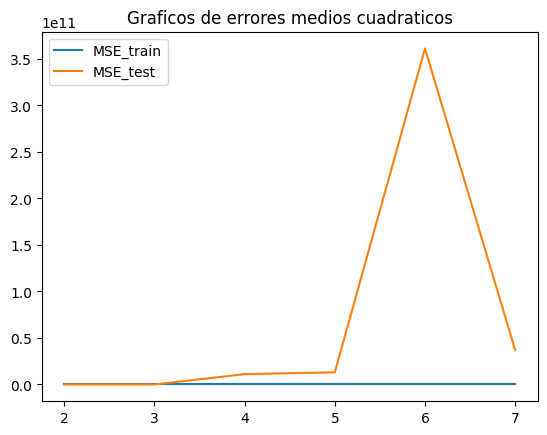

In [ ]:
plt.plot(range(2,8), train_error_vector, label="MSE_train")
plt.plot(range(2,8), test_error_vector, label="MSE_test")
plt.title("Graficos de errores medios cuadraticos")
plt.legend()
plt.show()

In [ ]:
x_train_first.shape,y_train.shape, (x_train_first.reshape(-1)).shape

((16512, 7), (16512,), (115584,))

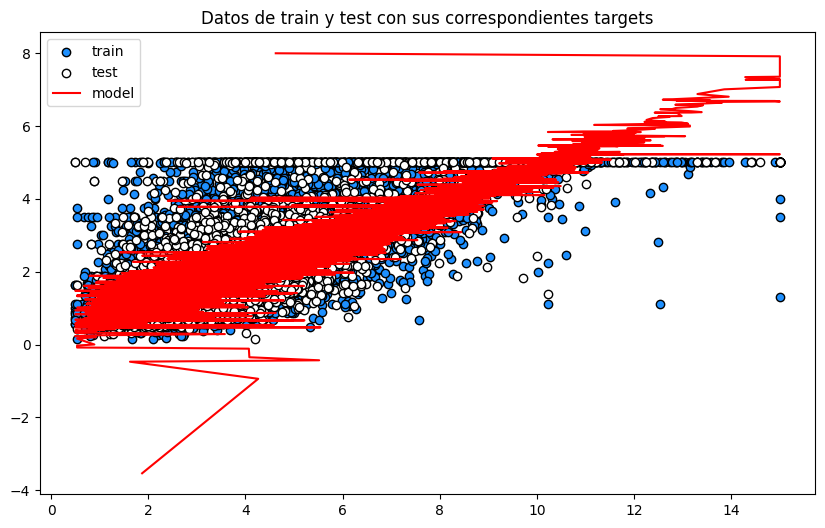

In [ ]:
degree = 1 #Grado de polinomio
pf = PolynomialFeatures(degree) #Creamos el modelo de regresion polinomial
lr = LinearRegression(fit_intercept=False)  #Creamos un modelo de regresion lineal, el bias ya esta como feature
model = make_pipeline(pf, lr) #Se unen los modelos para cubrir las partes que necesiten regresion lineal y polinomial segun sea el caso

model.fit(x_train[:, selector], y_train)
model_predictions_train = model.predict(x_train[:, selector])
model_predictions_test = model.predict(x_test[:, selector])

plt.figure(figsize=(10,6))
x_train_first = x_train[:, 0] #Selecciono solo el primer valor de cada observacion, correspondiente a la caracteristica de entrenamiento MedInc deL x_train.
x_test_first =x_test[:, 0]

# Obtener los índices que ordenan la variable y
indices_ordenados = np.argsort(model_predictions_train)

# Ordenar los valores de la variable y y las coordenadas x
y_ordenado = np.array(model_predictions_train)[indices_ordenados]
x_ordenado = np.array(x_train_first)[indices_ordenados]

plt.scatter(x_train_first, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(x_test_first, y_test, facecolor="white", edgecolor="k", label="test")
plt.plot(x_ordenado, y_ordenado, color="red", label="model")
#plt.plot(x_train_first, model_predictions, color="red", label="model")
#plt.scatter(x_test_first, y_test_pred, color="green", label="predicted")
plt.legend()
plt.title("Datos de train y test con sus correspondientes targets")

plt.show()